Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-43.34702283866066..319.48944645657195].


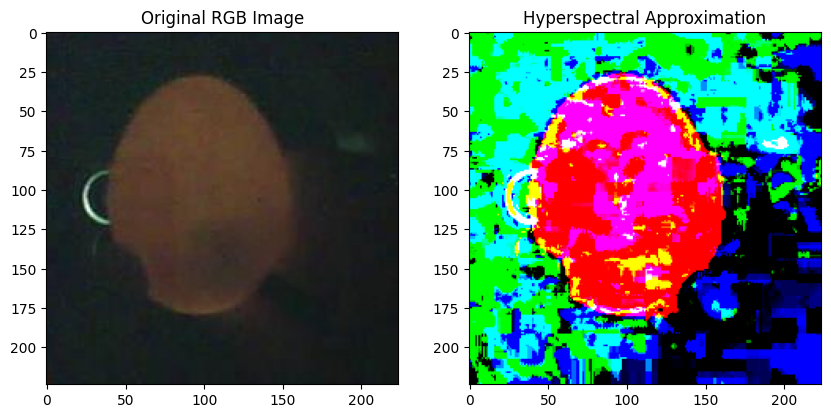

In [6]:
import cv2
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter, sobel

# Load the RGB image
image_path = "C:/Users/sirajje/Desktop/new egg dataset/train/fertile_1719888461711_jpg.rf.44a19bb8edda84314068c917a4446adc.jpg"  # Change this to your image path
rgb_image = cv2.imread(image_path)  # Read image
rgb_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
h, w, c = rgb_image.shape

# Reshape image into a 2D array (pixels x channels)
reshaped_img = rgb_image.reshape(-1, 3)

# Apply PCA to extract 3 spectral components
pca = PCA(n_components=3)
pca_transformed = pca.fit_transform(reshaped_img)
pca_transformed = pca_transformed.reshape(h, w, 3)  # Reshape correctly

# Generate additional synthetic spectral bands
blurred = gaussian_filter(rgb_image, sigma=2)  # Smoothed version
edges = np.stack([sobel(rgb_image[:, :, i]) for i in range(3)], axis=-1)  # Edge detection per channel

# Normalize additional bands
blurred = blurred / 255.0
edges = (edges - edges.min()) / (edges.max() - edges.min() + 1e-8)  # Normalize to [0, 1]

# Stack all 6 bands together
hyperspectral_image = np.concatenate([pca_transformed, blurred, edges], axis=-1)

# Visualize the original and transformed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(rgb_image)
plt.title("Original RGB Image")

plt.subplot(1, 2, 2)
plt.imshow(hyperspectral_image[:, :, :3])  # Display first 3 bands
plt.title("Hyperspectral Approximation")
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-47.719547283908206..190.8675723906869].


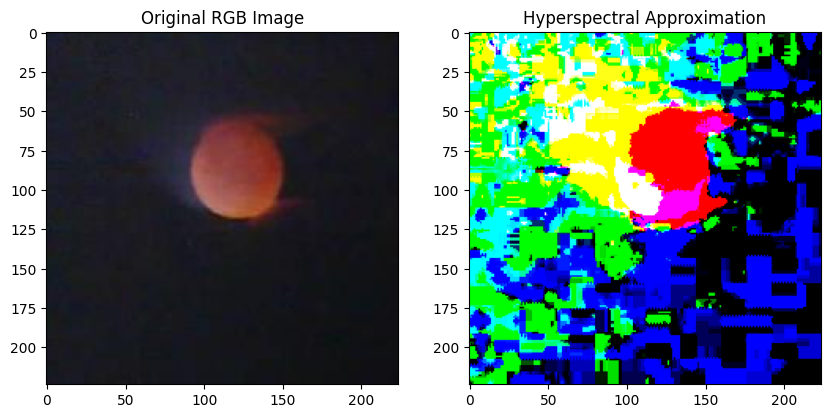

In [8]:
import cv2
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter, sobel

# Load the RGB image
image_path = "C:/Users/sirajje/Desktop/new egg dataset/test/infertile_1720665553625_jpg.rf.14e358c5aa119f565e5f395e958a1db6.jpg"  # Change this to your image path
rgb_image = cv2.imread(image_path)  # Read image
rgb_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
h, w, c = rgb_image.shape

# Reshape image into a 2D array (pixels x channels)
reshaped_img = rgb_image.reshape(-1, 3)

# Apply PCA to extract 3 spectral components
pca = PCA(n_components=3)
pca_transformed = pca.fit_transform(reshaped_img)
pca_transformed = pca_transformed.reshape(h, w, 3)  # Reshape correctly

# Generate additional synthetic spectral bands
blurred = gaussian_filter(rgb_image, sigma=2)  # Smoothed version
edges = np.stack([sobel(rgb_image[:, :, i]) for i in range(3)], axis=-1)  # Edge detection per channel

# Normalize additional bands
blurred = blurred / 255.0
edges = (edges - edges.min()) / (edges.max() - edges.min() + 1e-8)  # Normalize to [0, 1]

# Stack all 6 bands together
hyperspectral_image = np.concatenate([pca_transformed, blurred, edges], axis=-1)

# Visualize the original and transformed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(rgb_image)
plt.title("Original RGB Image")

plt.subplot(1, 2, 2)
plt.imshow(hyperspectral_image[:, :, :3])  # Display first 3 bands
plt.title("Hyperspectral Approximation")
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-60.47154760074643..338.73869898760256].


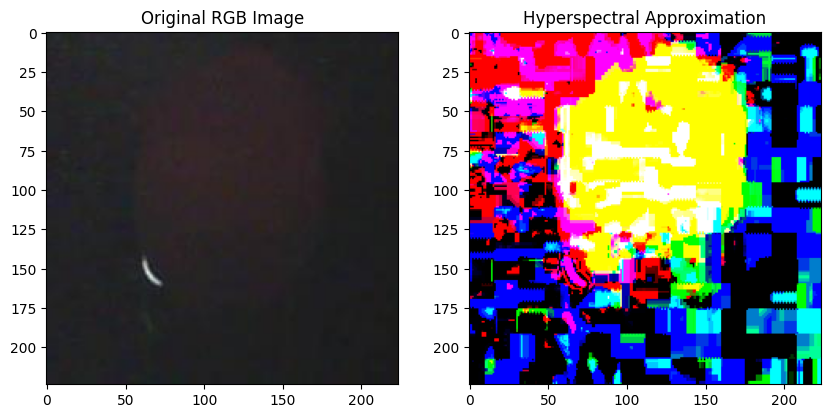

✅ Processed 20 images. Saved in C:/Users/sirajje/Desktop/new egg dataset/hyperspectral


In [9]:
import cv2
import numpy as np
import os
import random
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter, sobel

# Define dataset path
train_folder = "C:/Users/sirajje/Desktop/new egg dataset/train"  # Change this to your actual path

# Get all image filenames in the train folder
all_images = [f for f in os.listdir(train_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Select 20 random images
random_images = random.sample(all_images, 20)

# Create output folder for hyperspectral images
output_folder = "C:/Users/sirajje/Desktop/new egg dataset/hyperspectral"
os.makedirs(output_folder, exist_ok=True)

# Function to convert an image to hyperspectral bands
def convert_to_hyperspectral(image_path):
    rgb_image = cv2.imread(image_path)  # Read image
    rgb_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    h, w, c = rgb_image.shape

    # Flatten image for PCA
    reshaped_img = rgb_image.reshape(-1, 3)

    # Apply PCA to extract 3 spectral components
    pca = PCA(n_components=3)
    pca_transformed = pca.fit_transform(reshaped_img)
    pca_transformed = pca_transformed.reshape(h, w, 3)  # Reshape correctly

    # Generate additional synthetic spectral bands
    blurred = gaussian_filter(rgb_image, sigma=2)  # Smoothed version
    edges = np.stack([sobel(rgb_image[:, :, i]) for i in range(3)], axis=-1)  # Edge detection per channel

    # Normalize additional bands
    blurred = blurred / 255.0
    edges = (edges - edges.min()) / (edges.max() - edges.min() + 1e-8)  # Normalize to [0, 1]

    # Stack all 6 bands together
    hyperspectral_image = np.concatenate([pca_transformed, blurred, edges], axis=-1)
    
    return hyperspectral_image

# Process each image
for img_name in random_images:
    img_path = os.path.join(train_folder, img_name)
    hyperspectral_img = convert_to_hyperspectral(img_path)
    
    # Save the new image as a numpy array
    np.save(os.path.join(output_folder, img_name.replace('.jpg', '.npy').replace('.png', '.npy')), hyperspectral_img)

    # Optional: Display first image for visualization
    if img_name == random_images[0]:
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.imread(img_path)[:, :, ::-1])  # Original image
        plt.title("Original RGB Image")

        plt.subplot(1, 2, 2)
        plt.imshow(hyperspectral_img[:, :, :3])  # Display first 3 bands
        plt.title("Hyperspectral Approximation")
        plt.show()

print(f"✅ Processed {len(random_images)} images. Saved in {output_folder}")


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-24.818946017584565..42.76773060747125].


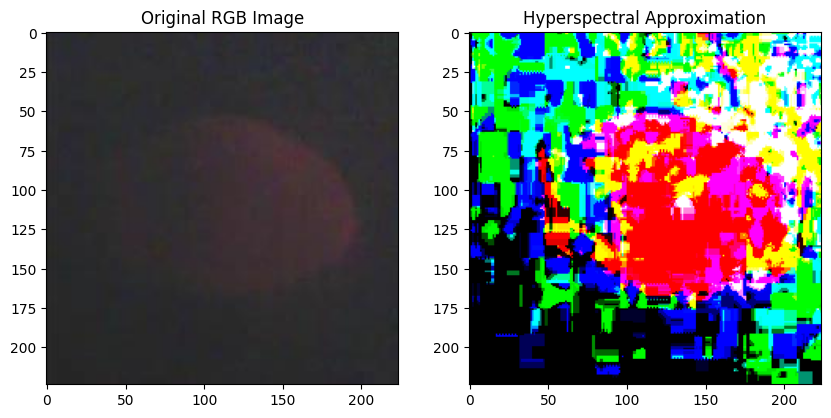

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-40.080181799599266..107.1267825222225].


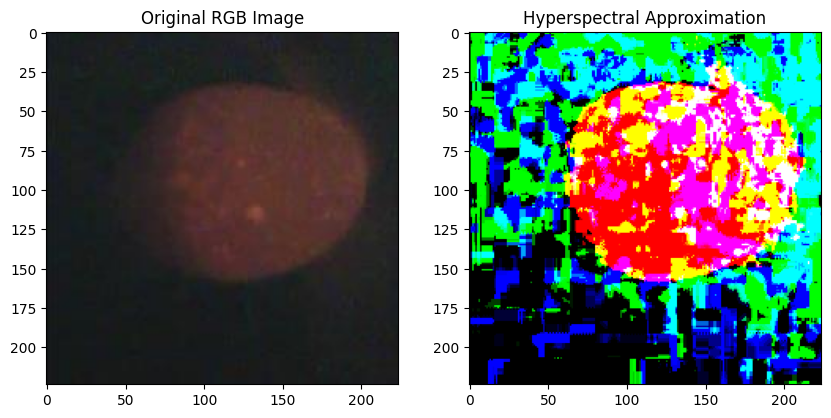

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-25.977874983228364..71.29412471059365].


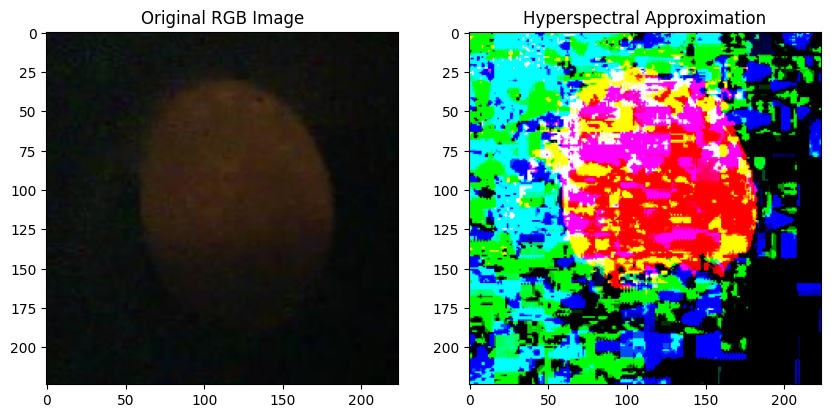

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-17.49175752640862..92.59106054504481].


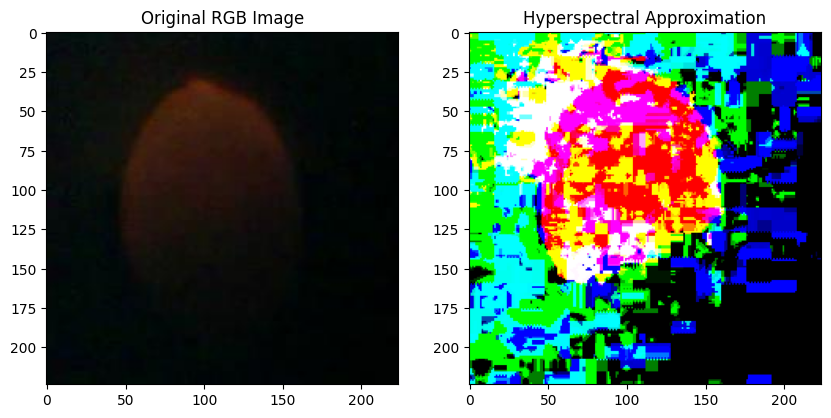

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-70.06037907737431..324.25776557354175].


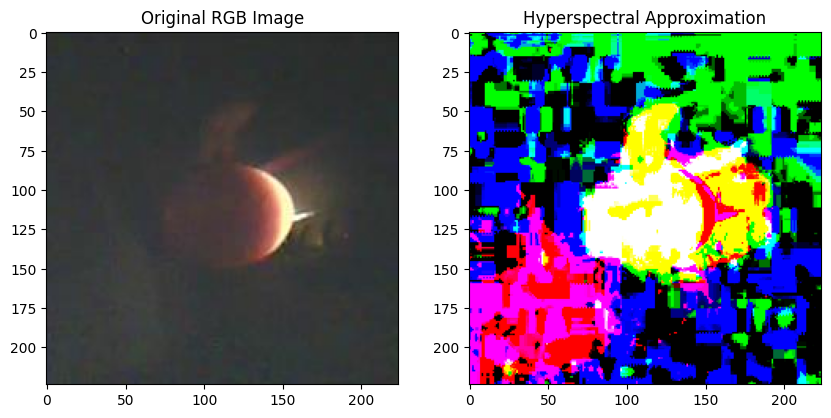

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-28.714313293241048..58.53363130077119].


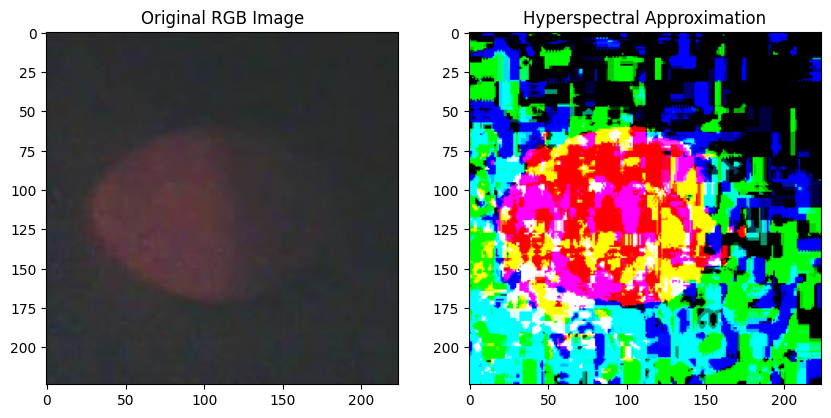

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-38.66482225288267..97.65375308678145].


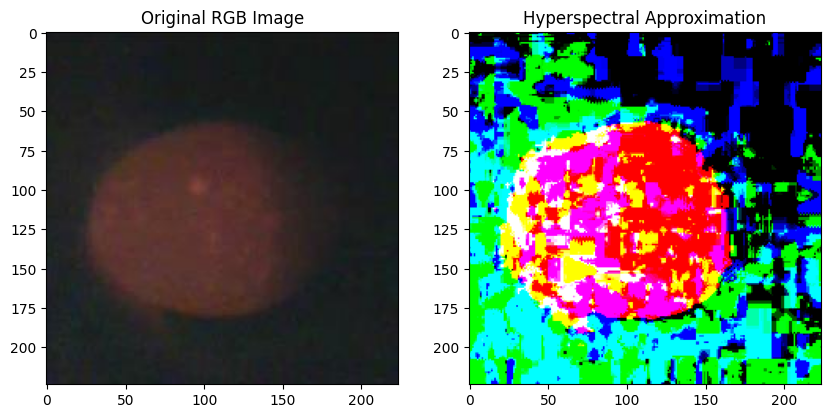

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-51.68800674693197..120.9375914528001].


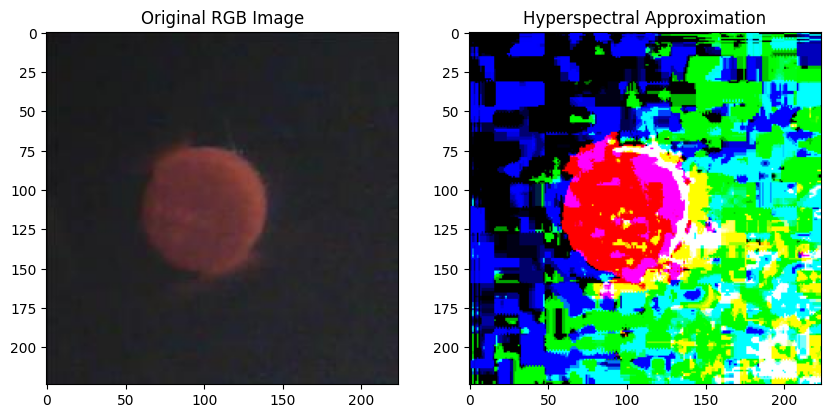

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-101.0609206461009..253.2219268409347].


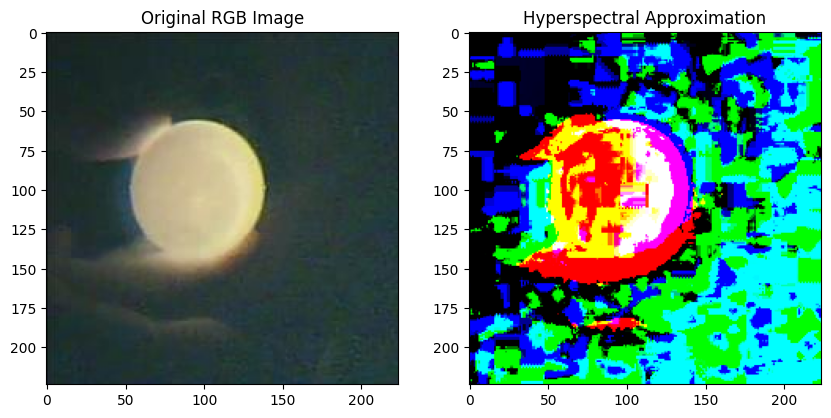

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-99.60293032470062..362.2910727717695].


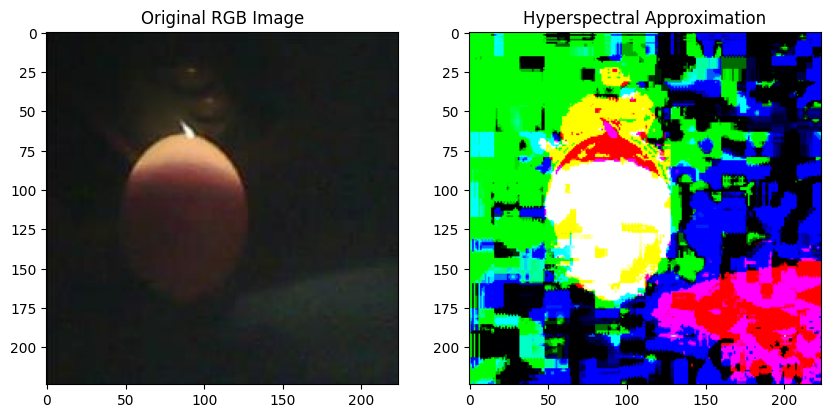

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-95.43270773780426..160.93542898261455].


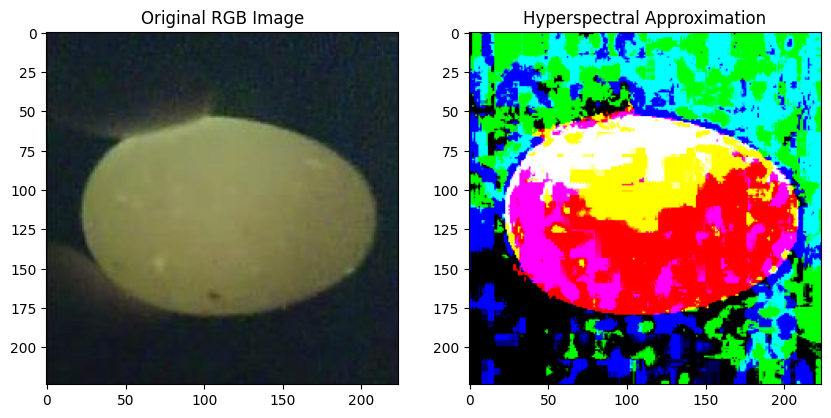

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-33.21469541722966..172.31699665538304].


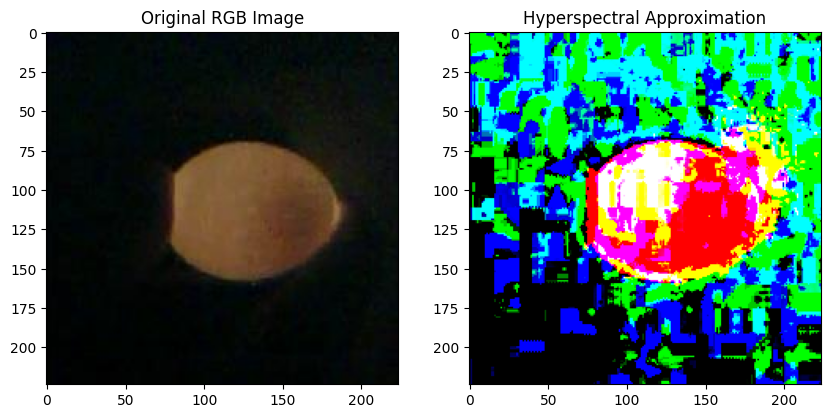

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-39.18407846003805..178.9754403810977].


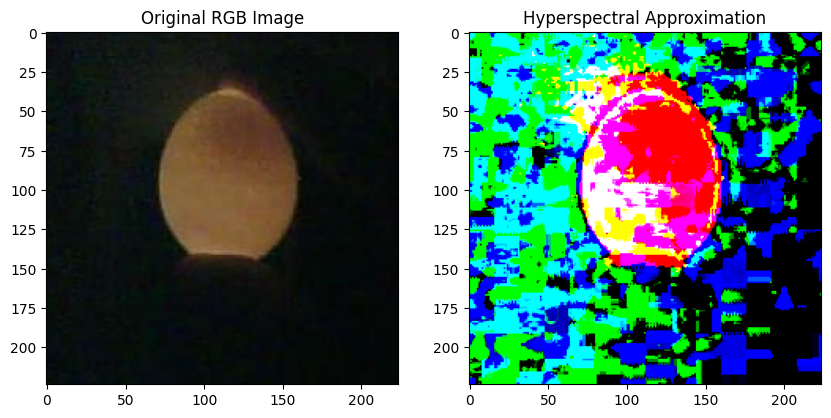

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-26.429120388690986..38.70194786536662].


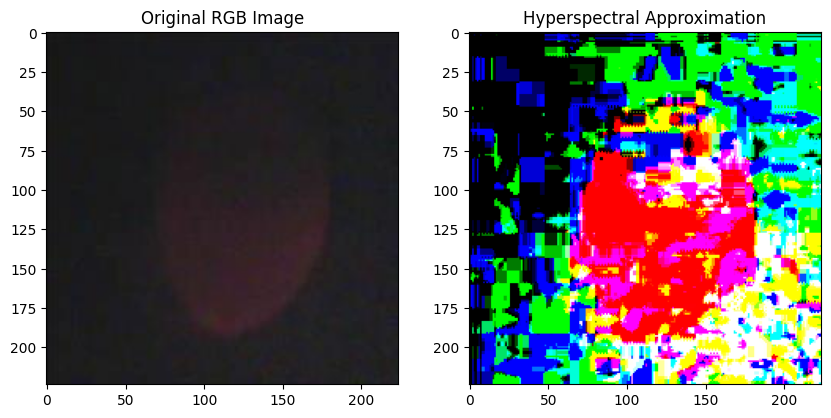

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-6.244152008752..25.74672937497234].


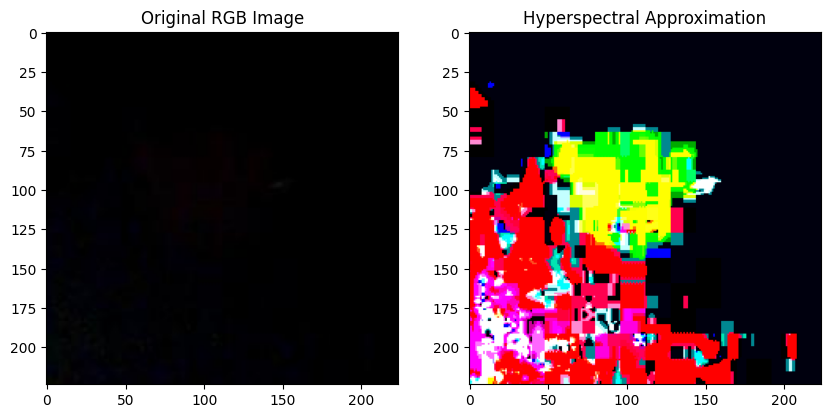

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-18.450408085137123..45.143244128255176].


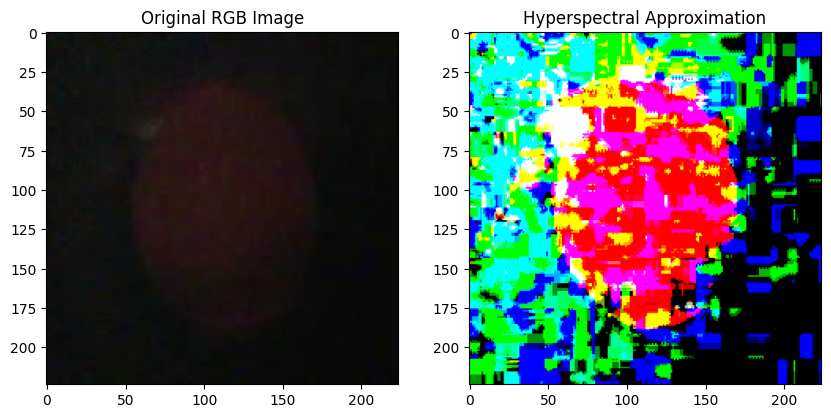

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-18.82401312167706..59.31583246515018].


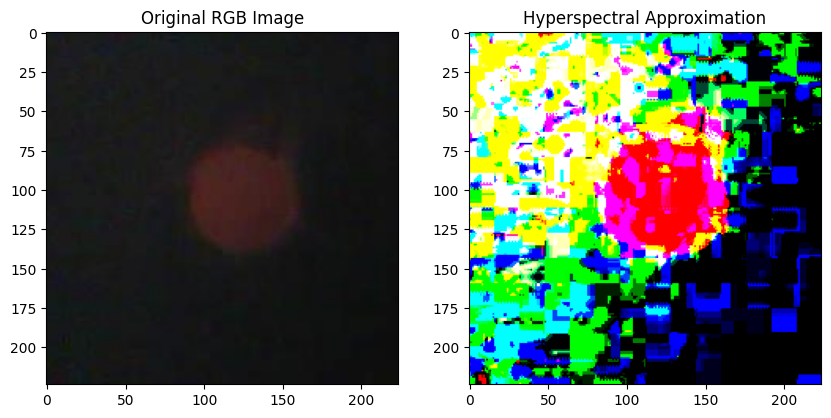

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-37.34362017705694..334.1477387540098].


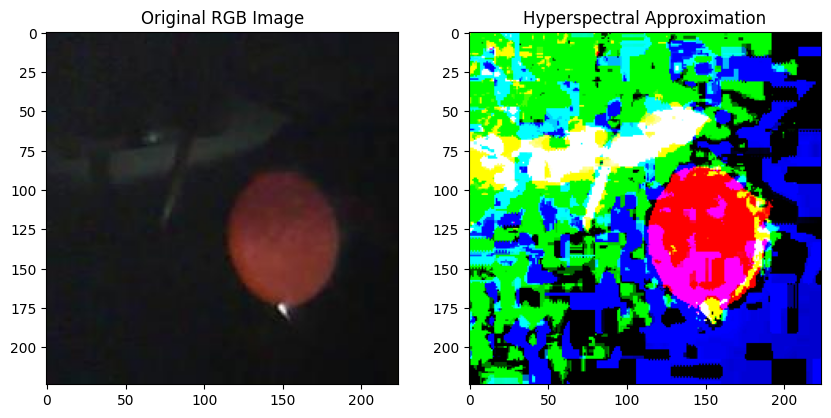

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-138.21495798285048..272.76628868464434].


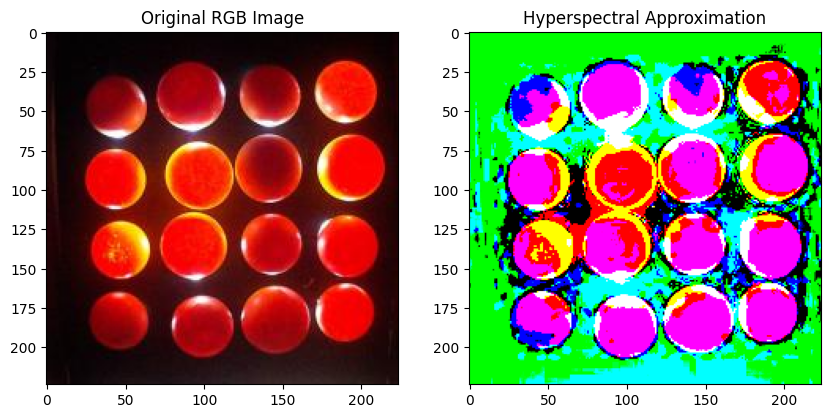

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.102831476256199..39.78454100686938].


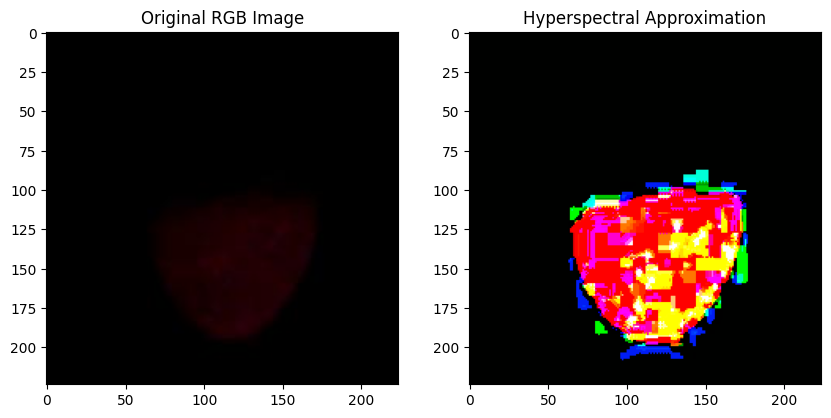

✅ Displayed 20 images successfully!


In [10]:
import cv2
import numpy as np
import os
import random
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter, sobel

# Define dataset path
train_folder = "C:/Users/sirajje/Desktop/new egg dataset/train"  # Change this to your actual path

# Get all image filenames in the train folder
all_images = [f for f in os.listdir(train_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Select 20 random images
random_images = random.sample(all_images, 20)

# Function to convert an image to hyperspectral bands
def convert_to_hyperspectral(image_path):
    rgb_image = cv2.imread(image_path)  # Read image
    rgb_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    h, w, c = rgb_image.shape

    # Flatten image for PCA
    reshaped_img = rgb_image.reshape(-1, 3)

    # Apply PCA to extract 3 spectral components
    pca = PCA(n_components=3)
    pca_transformed = pca.fit_transform(reshaped_img)
    pca_transformed = pca_transformed.reshape(h, w, 3)  # Reshape correctly

    # Generate additional synthetic spectral bands
    blurred = gaussian_filter(rgb_image, sigma=2)  # Smoothed version
    edges = np.stack([sobel(rgb_image[:, :, i]) for i in range(3)], axis=-1)  # Edge detection per channel

    # Normalize additional bands
    blurred = blurred / 255.0
    edges = (edges - edges.min()) / (edges.max() - edges.min() + 1e-8)  # Normalize to [0, 1]

    # Stack all 6 bands together
    hyperspectral_image = np.concatenate([pca_transformed, blurred, edges], axis=-1)
    
    return rgb_image, hyperspectral_image

# Process and display each image
for img_name in random_images:
    img_path = os.path.join(train_folder, img_name)
    original_img, hyperspectral_img = convert_to_hyperspectral(img_path)

    # Display the original and hyperspectral image
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(original_img)
    plt.title("Original RGB Image")

    plt.subplot(1, 2, 2)
    plt.imshow(hyperspectral_img[:, :, :3])  # Display first 3 bands
    plt.title("Hyperspectral Approximation")

    plt.show()

print(f"✅ Displayed {len(random_images)} images successfully!")


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-16.633492009489032..45.88617429402205].


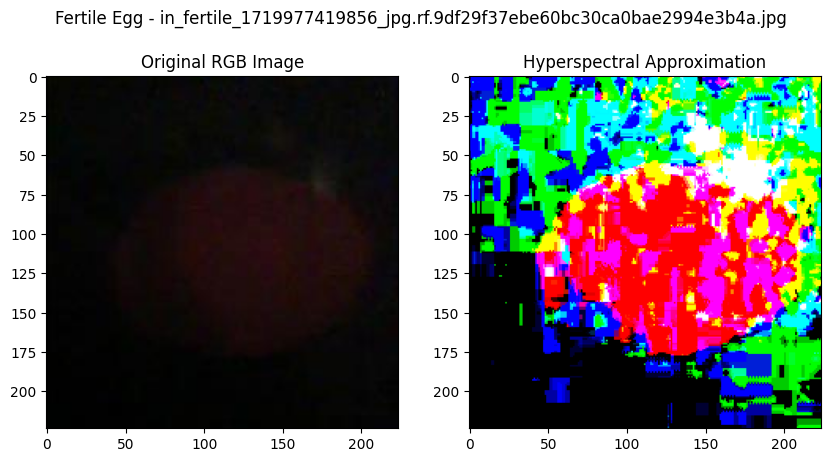

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-42.420512175174..71.62139664246529].


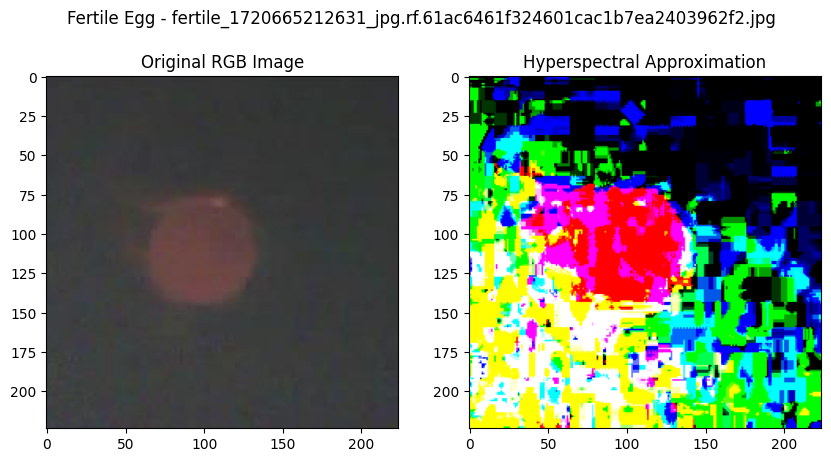

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-52.173494823385134..189.8836702029896].


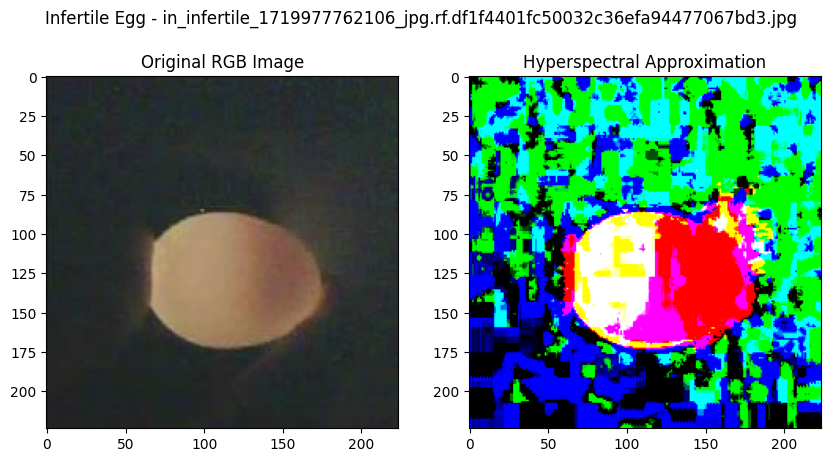

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-20.13699472391772..169.1699551994225].


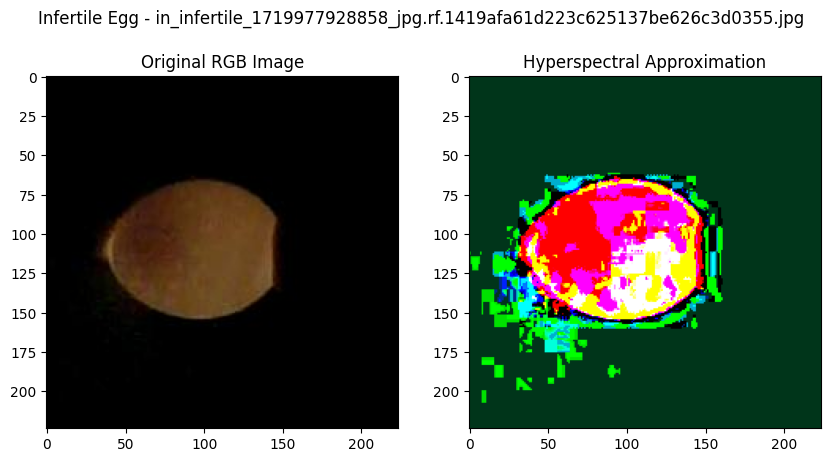

✅ Displayed 2 fertile and 2 infertile eggs successfully!


In [11]:
import cv2
import numpy as np
import os
import random
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter, sobel

# Define dataset path
train_folder = "C:/Users/sirajje/Desktop/new egg dataset/train"  # Change this to your actual path

# Get all image filenames in the train folder
all_images = os.listdir(train_folder)

# Filter images into fertile and infertile based on filename convention
fertile_images = [img for img in all_images if "fertile" in img.lower()]
infertile_images = [img for img in all_images if "infertile" in img.lower()]

# Select two images from each category
selected_fertile = random.sample(fertile_images, 2) if len(fertile_images) >= 2 else fertile_images
selected_infertile = random.sample(infertile_images, 2) if len(infertile_images) >= 2 else infertile_images

# Function to convert an image to hyperspectral bands
def convert_to_hyperspectral(image_path):
    rgb_image = cv2.imread(image_path)  # Read image
    rgb_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    h, w, c = rgb_image.shape

    # Flatten image for PCA
    reshaped_img = rgb_image.reshape(-1, 3)

    # Apply PCA to extract 3 spectral components
    pca = PCA(n_components=3)
    pca_transformed = pca.fit_transform(reshaped_img)
    pca_transformed = pca_transformed.reshape(h, w, 3)  # Reshape correctly

    # Generate additional synthetic spectral bands
    blurred = gaussian_filter(rgb_image, sigma=2)  # Smoothed version
    edges = np.stack([sobel(rgb_image[:, :, i]) for i in range(3)], axis=-1)  # Edge detection per channel

    # Normalize additional bands
    blurred = blurred / 255.0
    edges = (edges - edges.min()) / (edges.max() - edges.min() + 1e-8)  # Normalize to [0, 1]

    # Stack all 6 bands together
    hyperspectral_image = np.concatenate([pca_transformed, blurred, edges], axis=-1)
    
    return rgb_image, hyperspectral_image

# Display selected images
for category, images in [("Fertile", selected_fertile), ("Infertile", selected_infertile)]:
    for img_name in images:
        img_path = os.path.join(train_folder, img_name)
        original_img, hyperspectral_img = convert_to_hyperspectral(img_path)

        # Display the original and hyperspectral image
        plt.figure(figsize=(10, 5))
        plt.suptitle(f"{category} Egg - {img_name}")

        plt.subplot(1, 2, 1)
        plt.imshow(original_img)
        plt.title("Original RGB Image")

        plt.subplot(1, 2, 2)
        plt.imshow(hyperspectral_img[:, :, :3])  # Display first 3 bands
        plt.title("Hyperspectral Approximation")

        plt.show()

print(f"✅ Displayed {len(selected_fertile)} fertile and {len(selected_infertile)} infertile eggs successfully!")
